Compare the T,EM results get for old vs new responses

* 25-05-2022 IGH

In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import goesxrs_temp as gtem

from sunpy import timeseries as ts
from sunpy.net import attrs as a

# Just setup plot fonts
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [2]:
# Assumes have downloaded data, see https://github.com/ianan/xrs_example/blob/main/xrs15_example.ipynb
outdir='/Users/iain/sunpy/data/'
fn15=outdir+'sci_gxrs-l2-irrad_g15_d20101105_v0-0-0.nc'
g15 = ts.TimeSeries(fn15, concatenate=True)
# Then truncate to time range interested in
trange=a.Time("2010-11-05 13:08","2010-11-05 15:00")
tg15=g15.truncate(trange.start.iso,trange.end.iso)
# Extract out the time index and data channels
tg_tims=tg15.index
tg_x05=tg15.quantity("xrsa").value
tg_x18=tg15.quantity("xrsb").value

In [3]:
# Also need to work out an average background level in each GOES channel
# This is to subtract out the rest of the Sun from the flare 
# (which shouldn't be a big effect during the peak of the flare)
tbck=a.Time("2010-11-05 13:06:19","2010-11-05 13:07:30")
tbckg15=g15.truncate(tbck.start.iso,tbck.end.iso)
# Work out mean for each channel
# Need to be careful that no 0, negs or NaNs in there.....
bck05=np.mean(tbckg15.quantity("xrsa").value)
bck18=np.mean(tbckg15.quantity("xrsb").value)
print(bck05,bck18)

1.0091633e-08 5.327791e-07


In [4]:
# Work T,EM values using old response, with backsub
tmko, emo=gtem.get_tem(tg_x18-bck18,tg_x05-bck05,old_ver=True)
# Work T,EM values using new response, with backsub
tmk, em=gtem.get_tem(tg_x18-bck18,tg_x05-bck05,old_ver=False) #defaults False 

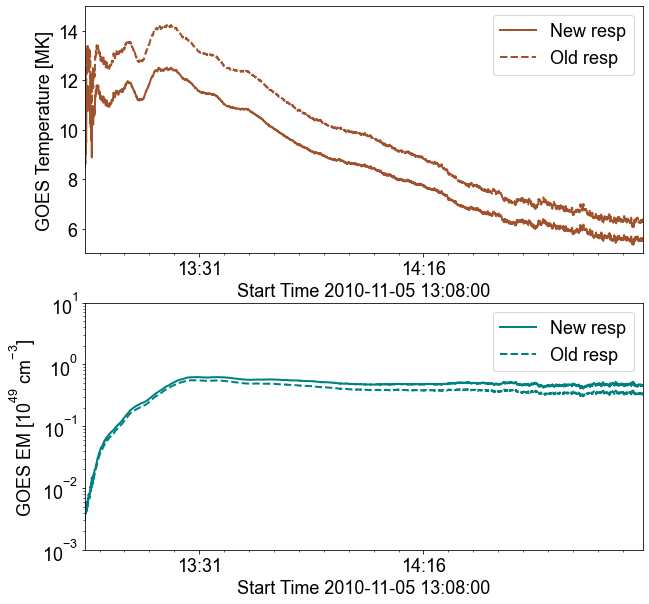

In [5]:
# Plot background subtracted for whole time range
fig= plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 1, 1)
plt.plot(tg_tims,tmk,marker=None,color='sienna',lw=2,label='New resp')
plt.plot(tg_tims,tmko,marker=None,color='sienna',ls='--',lw=2,label='Old resp')
ax1.set_ylabel("GOES Temperature [MK]")
ax1.set_xlabel("Start Time "+trange.start.iso[:-4])
ax1.set_ylim([5,15])
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlim([trange.start.datetime,trange.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=45)
minorx= matplotlib.dates.MinuteLocator(interval=5)
ax1.xaxis.set_major_locator(majorx)
ax1.xaxis.set_minor_locator(minorx)
ax1.xaxis.set_major_formatter(myFmt)
plt.legend()

ax2 = fig.add_subplot(2, 1, 2)
plt.plot(tg_tims,em*1e-49,marker=None,color='teal',lw=2,label='New resp')
plt.plot(tg_tims,emo*1e-49,marker=None,color='teal',ls='--',lw=2,label='Old resp')
ax2.set_ylabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax2.set_xlabel("Start Time "+trange.start.iso[:-4])
ax2.set_ylim([1e-3,1e1])
ax2.set_yscale("log")
ax2.set_xlim([trange.start.datetime,trange.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=45)
minorx= matplotlib.dates.MinuteLocator(interval=5)
ax2.xaxis.set_major_locator(majorx)
ax2.xaxis.set_minor_locator(minorx)
ax2.xaxis.set_major_formatter(myFmt)
plt.legend()
plt.show()


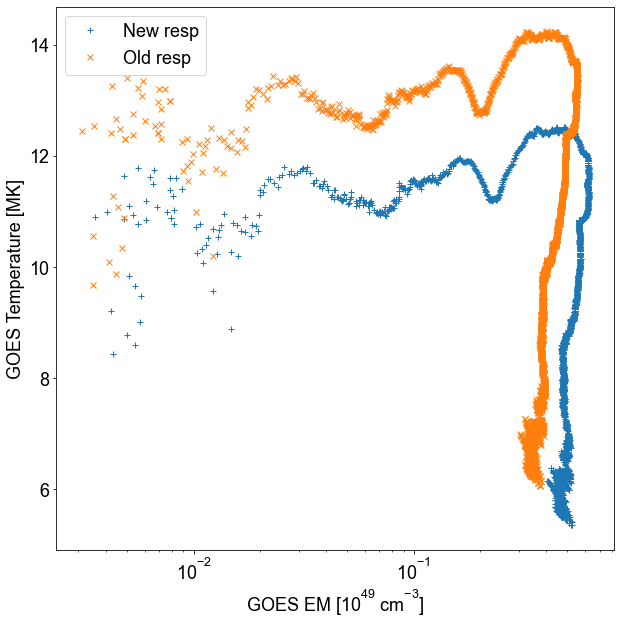

In [6]:
fig= plt.figure(figsize=(10, 10))

plt.plot(em*1e-49,tmk,'+',label='New resp')
plt.plot(emo*1e-49,tmko,'x',label='Old resp')
plt.xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
plt.ylabel("GOES Temperature [MK]")
plt.xscale('log')
plt.legend()
plt.show()